In [1]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [41]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import os

In [42]:
IMAGE_SIZE = [100, 100]

In [43]:
epochs = 5
batch_size = 32

In [59]:
train_path = 'large_files/fruits-360-original-size/fruits-360-original-size/Training'
valid_path = 'large_files/fruits-360-original-size/fruits-360-original-size/Validation'

In [60]:
image_files = []
for category in os.listdir(train_path):
    category_path = os.path.join(train_path, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpg'):
                image_files.append(os.path.join(category_path, file_name))

In [61]:
image_files

['large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_0.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_10.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_100.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_102.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_104.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_106.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_108.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_110.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_112.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6\\r0_114.jpg',
 'large_files/fruits-360-original-size/frui

In [62]:
valid_image_files = []
for category in os.listdir(valid_path):
    category_path = os.path.join(valid_path, category)
    if os.path.isdir(category_path):
        for file_name in os.listdir(category_path):
            if file_name.endswith('.jpg'):
                valid_image_files.append(os.path.join(category_path, file_name))

In [63]:
valid_image_files

['large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_1.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_101.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_105.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_109.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_113.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_117.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_121.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_125.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_129.jpg',
 'large_files/fruits-360-original-size/fruits-360-original-size/Validation\\apple_6\\r0_13.jpg',
 'large_files/fruits-36

In [40]:
image_files

['large_files/fruits-360-small/Training\\Apple Golden 1',
 'large_files/fruits-360-small/Training\\Avocado',
 'large_files/fruits-360-small/Training\\Banana',
 'large_files/fruits-360-small/Training\\Kiwi',
 'large_files/fruits-360-small/Training\\Lemon',
 'large_files/fruits-360-small/Training\\Mango',
 'large_files/fruits-360-small/Training\\Raspberry',
 'large_files/fruits-360-small/Training\\Strawberry']

In [64]:
folders = glob(train_path + '/*')

In [65]:
folders

['large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_6',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_braeburn_1',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_crimson_snow_1',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_golden_1',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_golden_2',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_golden_3',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_granny_smith_1',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_hit_1',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_pink_lady_1',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_red_1',
 'large_files/fruits-360-original-size/fruits-360-original-size/Training\\apple_red_2'

In [66]:
IMAGE_SIZE + [3]

[100, 100, 3]

In [67]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 12s 0us/step


In [68]:
for layer in vgg.layers:
    layer.trainable = False

In [69]:
vgg.output

<KerasTensor: shape=(None, 3, 3, 512) dtype=float32 (created by layer 'block5_pool')>

In [70]:
x = Flatten()(vgg.output)
x

<KerasTensor: shape=(None, 4608) dtype=float32 (created by layer 'flatten')>

In [71]:
len(folders)

24

In [72]:
prediction = Dense(len(folders), activation='softmax')(x)

In [98]:
vgg.input

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_1')>

In [73]:
model = Model(inputs=vgg.input, outputs=prediction)

In [75]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [76]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [77]:
gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

In [78]:
test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)

Found 3114 images belonging to 24 classes.
{'apple_6': 0, 'apple_braeburn_1': 1, 'apple_crimson_snow_1': 2, 'apple_golden_1': 3, 'apple_golden_2': 4, 'apple_golden_3': 5, 'apple_granny_smith_1': 6, 'apple_hit_1': 7, 'apple_pink_lady_1': 8, 'apple_red_1': 9, 'apple_red_2': 10, 'apple_red_3': 11, 'apple_red_delicios_1': 12, 'apple_red_yellow_1': 13, 'apple_rotten_1': 14, 'cabbage_white_1': 15, 'carrot_1': 16, 'cucumber_1': 17, 'cucumber_3': 18, 'eggplant_violet_1': 19, 'pear_1': 20, 'pear_3': 21, 'zucchini_1': 22, 'zucchini_dark_1': 23}


In [80]:
labels = [None] * len(test_gen.class_indices)
len(labels)

24

In [81]:
for k,v in test_gen.class_indices.items():
    labels[v] = k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min:  -114.90248 max:  151.061


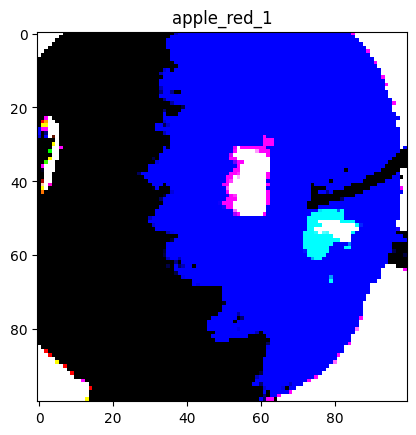

In [82]:
for x,y in test_gen:
    print("min: ", x[0].min(), "max: ", x[0].max())
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

In [86]:
train_generator = gen.flow_from_directory(
    train_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size
)

Found 6231 images belonging to 24 classes.


In [87]:
valid_generator = gen.flow_from_directory(
    valid_path,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size
)

Found 3114 images belonging to 24 classes.


In [99]:
r = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    steps_per_epoch=len(image_files) // batch_size,
    validation_steps=len(valid_image_files) // batch_size
)

Epoch 1/5
194/194 [==============================] - 31s 156ms/step - loss: 0.2984 - accuracy: 0.9740 - val_loss: 0.2895 - val_accuracy: 0.9755
Epoch 2/5
194/194 [==============================] - 30s 156ms/step - loss: 0.3574 - accuracy: 0.9706 - val_loss: 0.3090 - val_accuracy: 0.9765
Epoch 3/5
194/194 [==============================] - 31s 158ms/step - loss: 0.3299 - accuracy: 0.9745 - val_loss: 0.2400 - val_accuracy: 0.9810
Epoch 4/5
194/194 [==============================] - 31s 158ms/step - loss: 0.2756 - accuracy: 0.9779 - val_loss: 0.3293 - val_accuracy: 0.9752
Epoch 5/5
194/194 [==============================] - 31s 159ms/step - loss: 0.2760 - accuracy: 0.9774 - val_loss: 0.2020 - val_accuracy: 0.9839


In [89]:
def get_confusion_matrix(data_path, N):
    predictions = []
    targets = []
    for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
        p = model.predict(x)
        p = np.argmax(p, axis=1)
        y = np.argmax(y, axis=1)
        predictions = np.concatenate((predictions, p))
        targets = np.concatenate((targets, y))
        if len(targets) >= N:
            break

    cm = confusion_matrix(targets, predictions)
    return cm

In [91]:
cm = get_confusion_matrix(valid_path, len(valid_image_files))

Found 3114 images belonging to 24 classes.


In [92]:
valid_cm = get_confusion_matrix(valid_path, len(valid_image_files))

Found 3114 images belonging to 24 classes.


In [93]:
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i,j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()

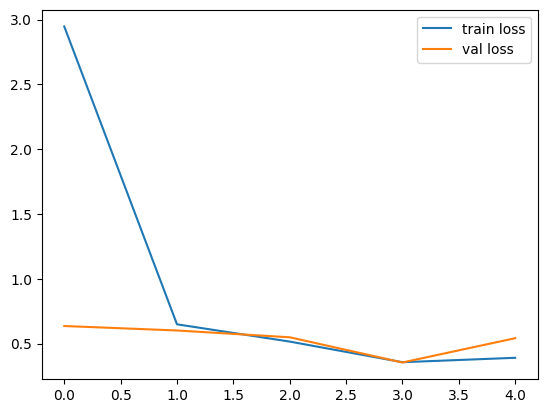

In [94]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

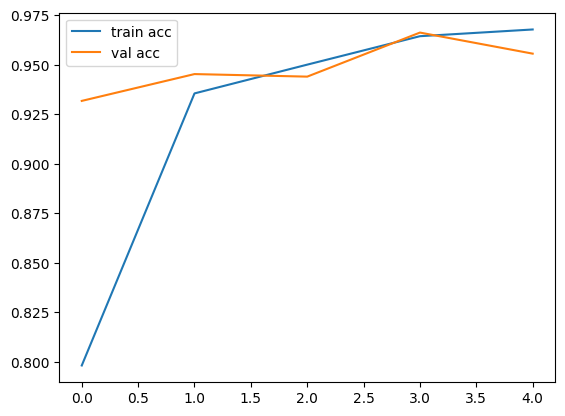

In [95]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()

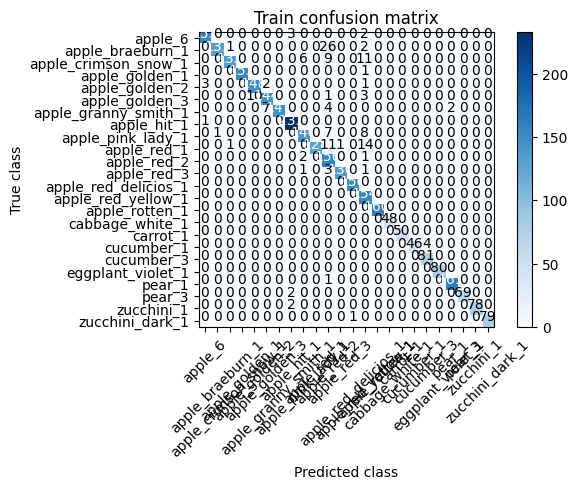

In [96]:
plot_confusion_matrix(cm, labels, title='Train confusion matrix')

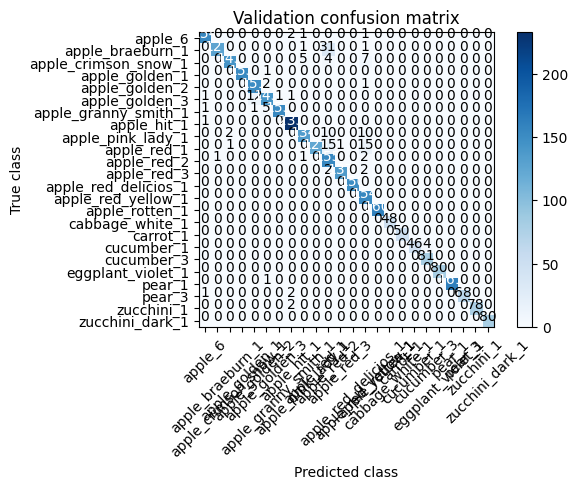

In [97]:
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')